<a href="https://colab.research.google.com/github/Bala534/Regproject/blob/main/DOC(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pandas import ExcelWriter
from pandas import ExcelFile

In [3]:
data = pd.read_excel('DOC Prediction_SVM.xlsx')
data.head()

,HC (%),NQF (%),C (%),Unnamed: 3,g/cm3,%,g/cm3.1,D_OC\n≥95% (Satisfactory)\n
0,0.0,0.00,23.02,2.00,1.25,16.0,0.8125,65.0
1,0.1,0.01,23.02,1.98,1.25,16.0,0.8250,66.0
2,0.2,0.02,23.03,1.96,1.27,16.1,0.8509,67.0
3,0.3,0.03,23.03,1.96,1.27,16.3,0.8636,68.0
4,0.4,0.04,23.04,1.93,1.28,16.3,0.8832,69.0


In [4]:
data.rename(columns = {'Unnamed: 3':'Ac','g/cm3':'Dmax','%':'Wmax','g/cm3.1':'Dpart'}, inplace = True) # Changing the column names

In [5]:
data.columns

Index(['HC (%)', 'NQF (%)', 'C (%)', 'Ac', 'Dmax', 'Wmax', 'Dpart',
       'D_OC\n≥95% (Satisfactory)\n'],
      dtype='object')

In [6]:
data.isna().any()

HC (%)                         False
NQF (%)                        False
C (%)                          False
Ac                             False
Dmax                           False
Wmax                           False
Dpart                          False
D_OC\n≥95% (Satisfactory)\n    False
dtype: bool

In [7]:
data.isna().sum().sum()

0

In [8]:
data.shape

(121, 8)

**Conduct Pearson’s regression to determine the agreement between all parameters with the output (DOC) and present basic linear fittings.**

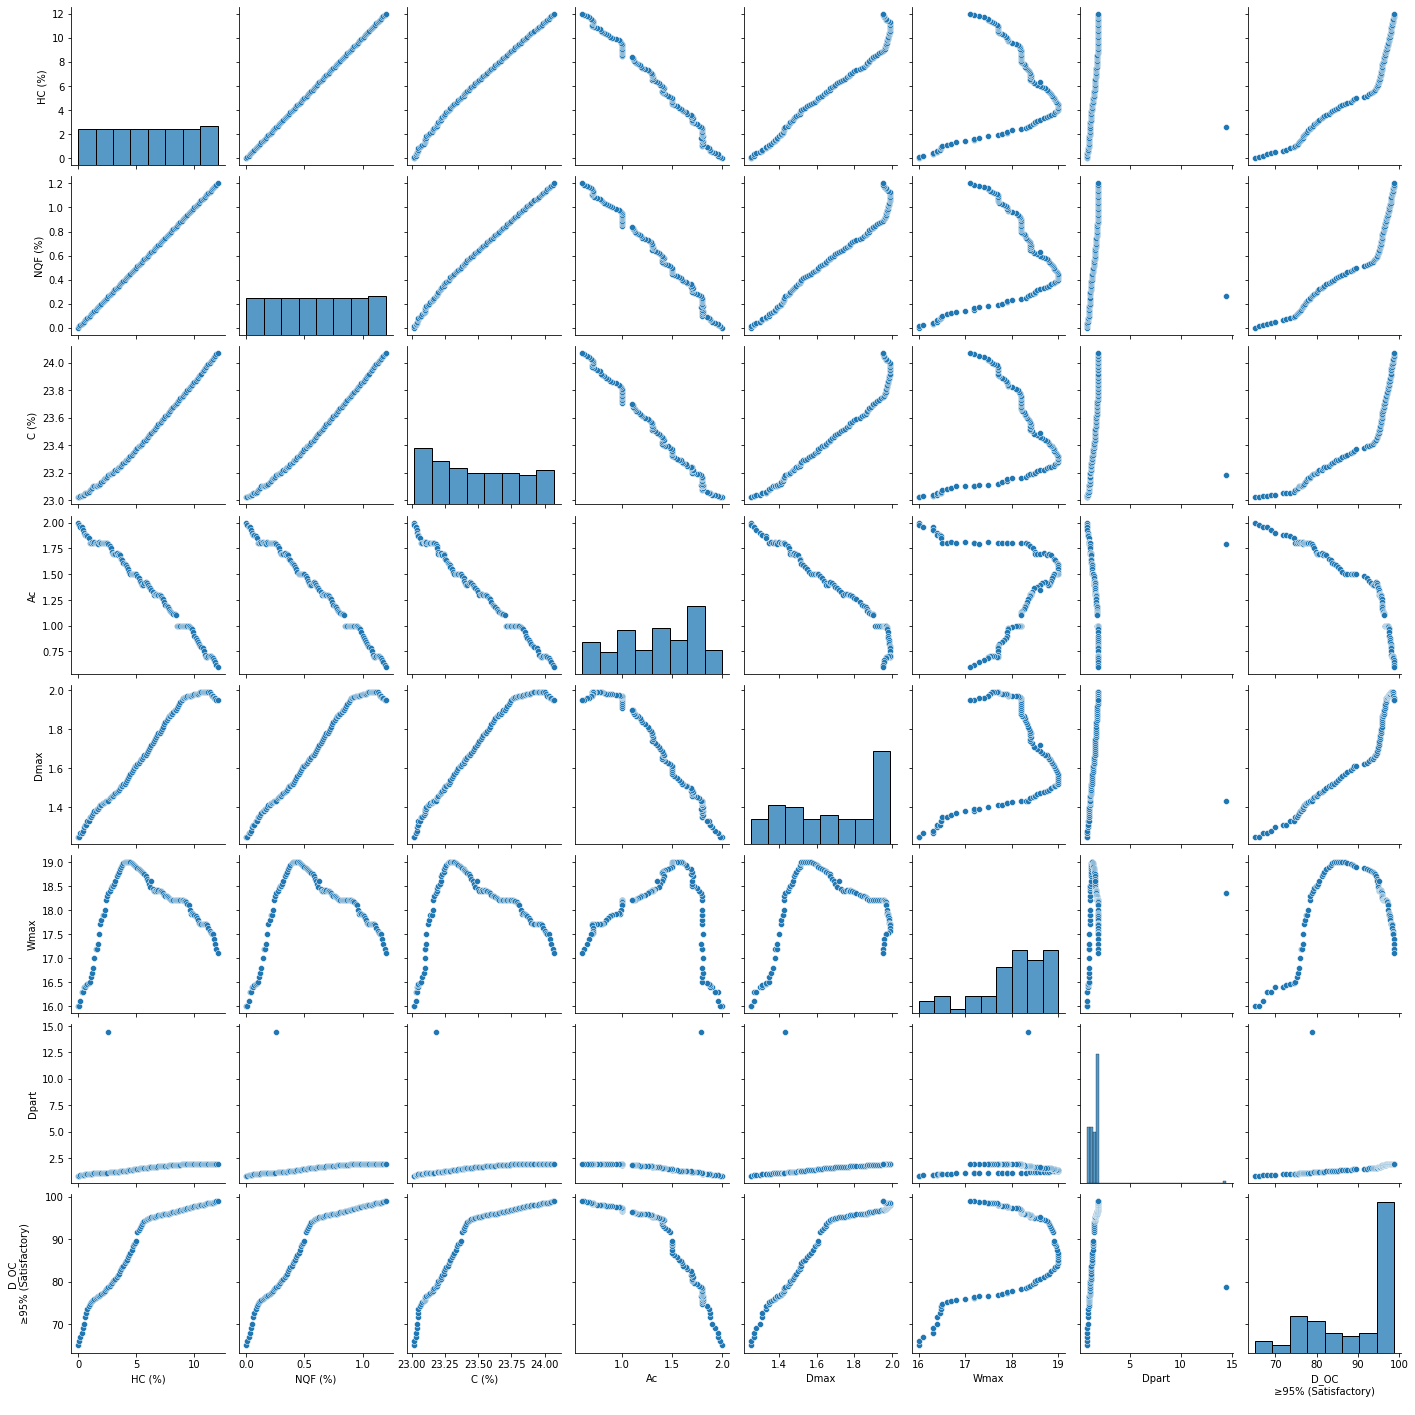

In [9]:
sns.pairplot(data)

In [10]:
corMat = data.corr()
print(corMat)

                               HC (%)  ...  D_OC\n≥95% (Satisfactory)\n
HC (%)                       1.000000  ...                     0.937814
NQF (%)                      1.000000  ...                     0.937814
C (%)                        0.996439  ...                     0.909500
Ac                          -0.993883  ...                    -0.911050
Dmax                         0.985771  ...                     0.955159
Wmax                         0.201388  ...                     0.437399
Dpart                        0.204444  ...                     0.195827
D_OC\n≥95% (Satisfactory)\n  0.937814  ...                     1.000000

[8 rows x 8 columns]


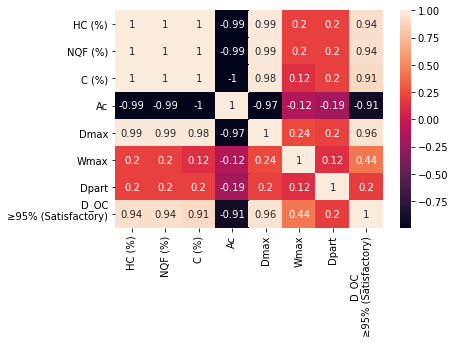

In [11]:
sns.heatmap(corMat, annot=True)
plt.show()

**Present frequency histograms of the variables.**

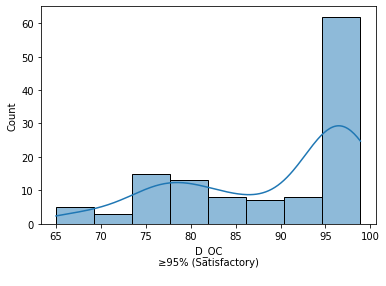

In [12]:
sns.histplot(data=data, x="D_OC\n≥95% (Satisfactory)\n",kde=True)

**Train, Validate and Test. Present the architecture of the program.**

In [13]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [14]:
features = data[['HC (%)','NQF (%)','C (%)','Ac','Dmax','Wmax','Dpart']].values
labels = data[['D_OC\n≥95% (Satisfactory)\n']].values

In [15]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.2)

In [16]:
model =SVR(kernel='linear')  
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [17]:
y_pred = model.predict(x_test)
y_pred

array([ 93.16657534,  92.43083396,  96.06510638,  94.61957324,
        89.83316803,  75.19303834,  97.67229732,  90.19583871,
        71.151462  ,  88.26540029,  99.26233268,  99.2821018 ,
        80.23109666,  92.79874768,  74.08694403,  72.03663627,
        98.38644735,  88.04812178,  96.98401147,  87.20458627,
        78.59683752,  90.40333007,  99.27605842, 141.53596004,
        72.60738692])

In [18]:
mean_absolute_error(y_test,y_pred)

4.255543507574999

In [19]:
mean_squared_error(y_test,y_pred)

161.8380662878189

In [20]:
from math import sqrt
rmse = sqrt(mean_squared_error(y_test,y_pred)) # calculating the root mean squared error for actual and predicted values
rmse

12.721559113875111

In [21]:
r2_score(y_test,y_pred)

-0.9452812937263078

In [22]:
x1 = np.array(['MAE','MSE','RMSE','R2_error'])
y1 = np.array([1.9,5.3,2.3,0.9])

Text(0, 0.5, 'value')

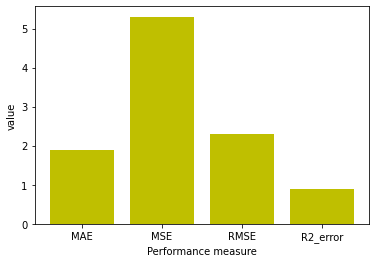

In [23]:
plt.bar(x1,y1,color='y')
plt.xlabel('Performance measure')
plt.ylabel('value')

In [24]:
from sklearn.model_selection import cross_validate,KFold,cross_val_score

In [25]:
cross_val_score(SVR(),features,labels).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

-41.84395639479355

In [26]:
a = data['D_OC\n≥95% (Satisfactory)\n'].tail(25)
b = y_pred

Text(0, 0.5, 'Predicted D_OC\n≥95% (Satisfactory)\n')

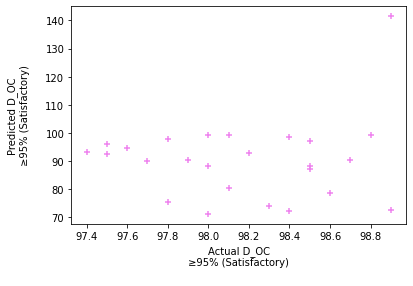

In [27]:
plt.scatter(a,b,color='violet',marker='+')
plt.xlabel('Actual D_OC\n≥95% (Satisfactory)\n')
plt.ylabel('Predicted D_OC\n≥95% (Satisfactory)\n')

**Present the parametric study graph**

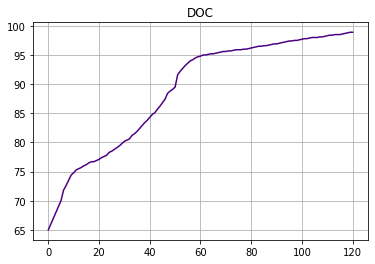

In [28]:
z = data['D_OC\n≥95% (Satisfactory)\n']
plt.plot(z,color='indigo')
plt.title('DOC')
plt.grid()

**Conduct sensitivity analysis to determine the influence of parameter on the predicted parameters.**

In [44]:
from sklearn.datasets import make_regression
from xgboost import XGBRegressor

M, n = make_regression(n_samples=500, n_features=7, n_informative=2, noise=0.3)
M = pd.DataFrame(M, columns=['HC','NQF','C','Ac','Dm','Wm','Dpart'])

model = XGBRegressor()
model.fit(M, n)

[05:38:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

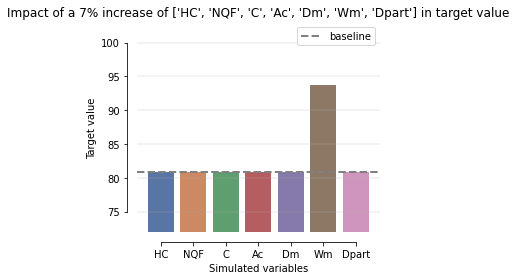

In [45]:
class Simulate:
    def __init__(self, obs, var):
        self.obs = obs
        self.var = var

    def simulate_increase(self, model, percentage):
        baseline = model.predict(self.obs)
        plus = {}
        for ivar in self.var:
            M_plus = self.obs.copy()
            M_plus[ivar] = M_plus[ivar] + M_plus[ivar] * (percentage / 100)
            plus[ivar] = model.predict(M_plus)
        b = pd.DataFrame(
            plus, index=['simulated'
                         ]).T.reset_index().rename(columns={'index': 'test'})
        b['baseline'] = baseline[0]
        return b

    @staticmethod
    def plot_simulation(d, **kwargs):
        fig, ax = plt.subplots()
        sns.barplot(x='test', y='simulated', data=d, palette='deep', ax=ax)
        ax.axhline(d['baseline'].values[0], color='grey', linestyle='--', linewidth=2)
        ax.plot([0, 0], [-100, -100], color='grey', linestyle='--', linewidth=2, label='baseline')

        maxi = int(d['simulated'].max() + d['simulated'].max() * 0.1)
        mini = int(d['simulated'].min() - d['simulated'].min() * 0.1)
        ax.set_ylim([mini, maxi])

        ax.set_xlabel('Simulated variables')
        ax.set_ylabel('Target value')
        ax.set_title(kwargs.get('title'))
        ax.legend()

        ax.grid(axis='y', linewidth=.3)
        sns.despine(offset=10, trim=True)
        plt.tight_layout()
        plt.show()


VAR_OPTIMIZE = ['HC','NQF','C','Ac','Dm','Wm','Dpart']
PERC = 7
ROW = M.iloc[[29]]

S = Simulate(obs=ROW, var=VAR_OPTIMIZE)
d = S.simulate_increase(model=model, percentage=PERC)
S.plot_simulation(d, title=f'Impact of a {PERC}% increase of {VAR_OPTIMIZE} in target value')

Automatically created module for IPython interactive environment


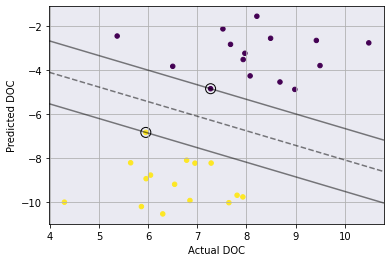

In [31]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 30 separable points
X, y = make_blobs(n_samples=30, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=20)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['-', '--', '-'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.xlabel('Actual DOC')
plt.ylabel('Predicted DOC')
plt.grid()
ax.set_facecolor('#EAEAF2')

plt.show()